<a href="https://colab.research.google.com/gist/Muyiiwaa/91712599fa3a3edfe836d6e715b862cc/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# for data wrangling
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for data modelling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
data = pd.read_csv('cleaned_marketing.csv')

### DATA WRANGLING

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# inspect missing values

data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# check to make sure the data type is right

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
# generate age and duration_of_patronage column

data['customer_age'] = [2024-x for x in data['Year_Birth']]
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['duration_of_patronage'] = [2024 - x.year for x in data['Dt_Customer']]

In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_age,duration_of_patronage
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,12
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,10
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,11
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,10
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,10


In [10]:
# drop redundant columns
data.drop(columns = ['ID','Year_Birth','Dt_Customer'], inplace = True)

In [11]:
# cast income to numeric data type
data = data[data['Income'] != ' ']
data = data.astype({'Income': 'float'})

In [12]:
# clean the categorical variables
print(f"previous categories: {data['Education'].unique()}")
data['Education'] = ['Bsc' if x == 'Graduation' else
                     'Msc' if x == 'Master' else 'Primary' if x == 'Basic'
                     else 'Ssce' if x == '2n Cycle' else x for x in data['Education']]
print(f"categories after: {data['Education'].unique()}")

previous categories: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
categories after: ['Bsc' 'PhD' 'Msc' 'Primary' 'Ssce']


In [13]:
print(f"previous categories: {data['Marital_Status'].unique()}")
data['Marital_Status'] = ['Single' if x in ['Single','YOLO','Absurd','Alone']
                          else 'dating' if x == 'Together' else x for x in data['Marital_Status']]
print(f"categories after: {data['Marital_Status'].unique()}")

previous categories: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
categories after: ['Single' 'dating' 'Married' 'Divorced' 'Widow']


## DATA VISUALIZATION

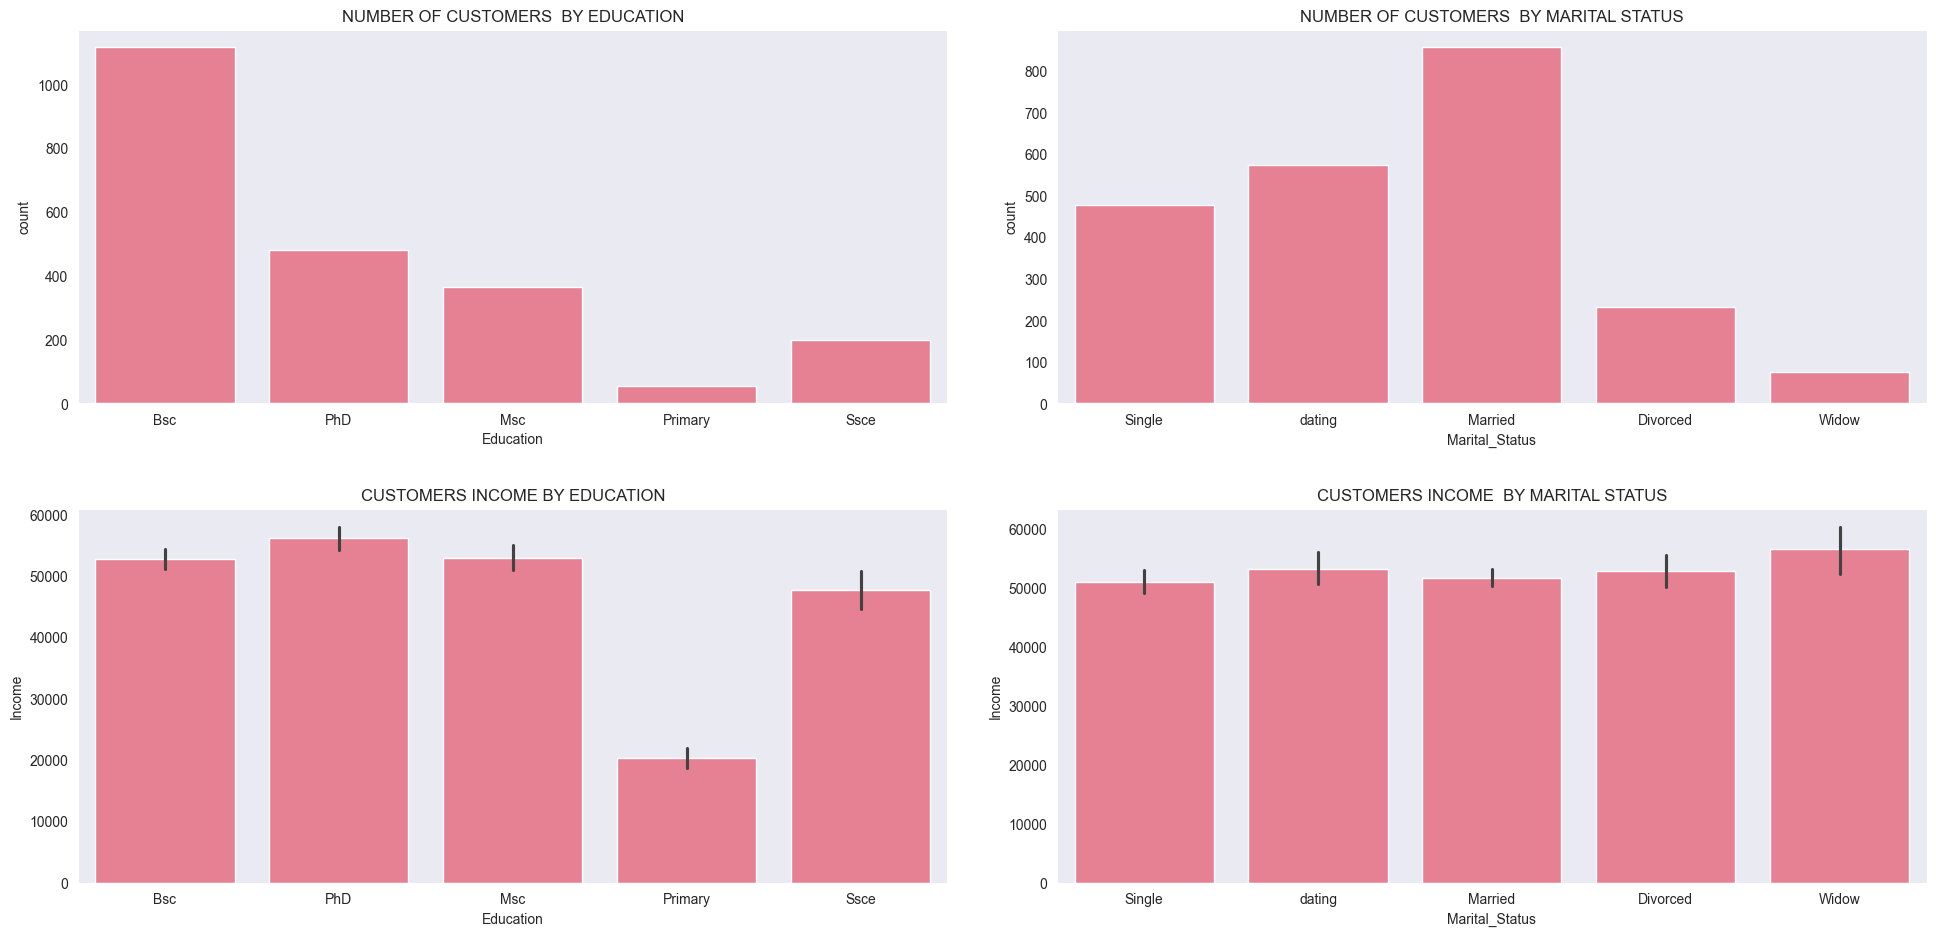

In [14]:
sns.set_style('dark')
sns.set_palette('husl')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
sns.countplot(data = data, x = 'Education', ax=axes[0,0])
sns.countplot(data = data, x = 'Marital_Status', ax=axes[0,1])
sns.barplot(data = data, x = 'Education',y = 'Income', ax=axes[1,0])
sns.barplot(data = data, x = 'Marital_Status',y ='Income', ax=axes[1,1])

axes[0,0].set_title('NUMBER OF CUSTOMERS  BY EDUCATION')
axes[0,1].set_title('NUMBER OF CUSTOMERS  BY MARITAL STATUS')
axes[1,0].set_title('CUSTOMERS INCOME BY EDUCATION')
axes[1,1].set_title('CUSTOMERS INCOME  BY MARITAL STATUS')

fig.tight_layout(pad = 3)

In [15]:
## check anova to validate the visuals

### DATA MODELLING (customer segmentation)

In [16]:
# encode our data
final_data = data.copy()

encoder = LabelEncoder()

cols = ['Education', 'Marital_Status']
for col in cols:
  data[col] = encoder.fit_transform(data[col])

In [17]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_age,duration_of_patronage
0,0,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,12
1,0,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,10
2,0,4,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,11
3,0,4,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,10
4,2,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,43,10


In [18]:
# scale the dataset
scaler = StandardScaler()
columns = data.columns
data = scaler.fit_transform(data)

In [19]:
data = pd.DataFrame(data = data, columns = list(columns))



In [20]:
# apply pca
columns = ['column1', 'column2','column3']
pca = PCA(n_components=3)
data = pca.fit_transform(data)
data = pd.DataFrame(data=data, columns=columns)

In [21]:
data.head()

,column1,column2,column3
0,3.849476,0.527337,-0.042062
1,-2.405698,-0.259535,-0.487200
2,1.649330,-0.016654,-1.135197
3,-2.535202,-1.622008,-0.022867
4,-0.535915,-0.441032,-0.670374


In [26]:
px.scatter_3d(data_frame=data, x = 'column1',
              y = 'column2', z = 'column3',
              width = 600, color = predictions)

In [ ]:
# create cluster

kmeans = KMeans(n_clusters=4, n_init='auto',random_state=23)
predictions = kmeans.fit_predict(data)

In [25]:
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [27]:
final_data['clusters'] = [f'cluster_{x}' for x in  predictions]
final_data['children'] = final_data['Kidhome'] + final_data['Teenhome']

In [28]:
final_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_age,duration_of_patronage,clusters,children
0,Bsc,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,3,11,1,67,12,cluster_0,0
1,Bsc,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,3,11,0,70,10,cluster_1,2
2,Bsc,dating,71613.0,0,0,26,426,49,127,111,...,0,0,0,3,11,0,59,11,cluster_0,0
3,Bsc,dating,26646.0,1,0,26,11,4,20,10,...,0,0,0,3,11,0,40,10,cluster_1,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,3,11,0,43,10,cluster_1,1


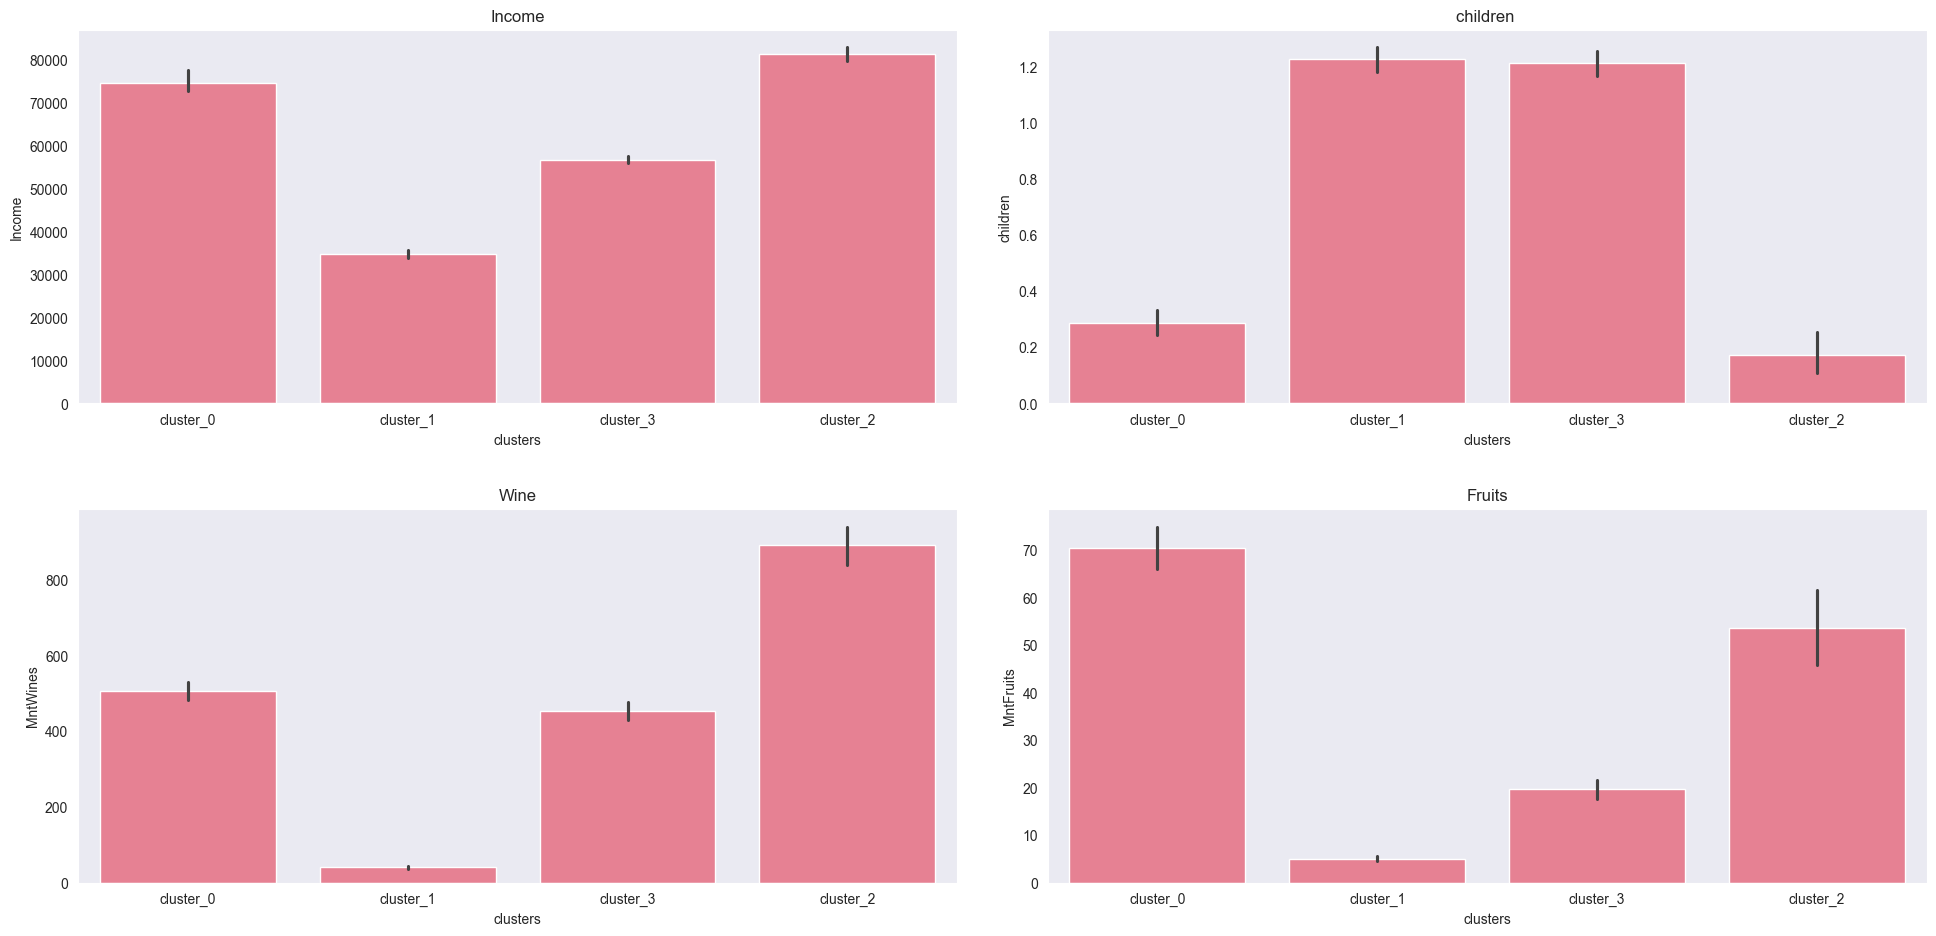

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
sns.barplot(data = final_data, x = 'clusters',y = 'Income', ax=axes[0,0])
sns.barplot(data = final_data, x = 'clusters',y ='children', ax=axes[0,1])
sns.barplot(data = final_data, x = 'clusters',y = 'MntWines', ax=axes[1,0])
sns.barplot(data = final_data, x = 'clusters',y ='MntFruits', ax=axes[1,1])

axes[0,0].set_title('Income')
axes[0,1].set_title('children ')
axes[1,0].set_title('Wine')
axes[1,1].set_title('Fruits')

fig.tight_layout(pad = 3)

In [30]:
final_data[final_data['clusters'] == 'cluster_1']

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_age,duration_of_patronage,clusters,children
1,Bsc,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,3,11,0,70,10,cluster_1,2
3,Bsc,dating,26646.0,1,0,26,11,4,20,10,...,0,0,0,3,11,0,40,10,cluster_1,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,3,11,0,43,10,cluster_1,1
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,0,0,0,3,11,0,39,11,cluster_1,1
8,PhD,dating,30351.0,1,0,19,14,0,24,3,...,0,0,0,3,11,1,50,11,cluster_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,Bsc,Married,24434.0,2,0,9,3,2,8,20,...,0,0,0,3,11,0,52,10,cluster_1,2
2230,Bsc,Single,11012.0,1,0,82,24,3,26,7,...,0,0,0,3,11,0,40,11,cluster_1,1
2232,Bsc,Single,26816.0,0,0,50,5,1,6,3,...,0,0,0,3,11,0,38,12,cluster_1,0
2234,Bsc,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,3,11,0,50,11,cluster_1,1


<Axes: xlabel='clusters', ylabel='count'>

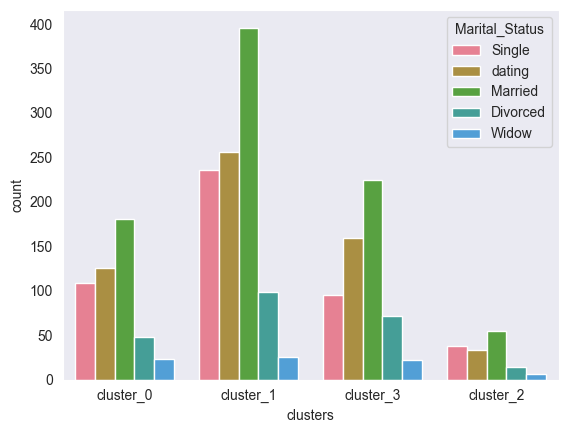

In [31]:
sns.countplot(data = final_data, x = 'clusters',hue ='Marital_Status')